In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [11]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
train_images.shape

(60000, 28, 28)

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])#分别代表，优化器、代价函数和？？

In [29]:
model.fit(train_images, train_labels, epochs=10)#epoch应该是迭代的次数

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 2.4504 - accuracy: 0.6802
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.7181 - accuracy: 0.7355
Epoch 3/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.6176 - accuracy: 0.7735
Epoch 4/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5282 - accuracy: 0.8082
Epoch 5/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.5063 - accuracy: 0.8213
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4923 - accuracy: 0.8285
Epoch 7/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4783 - accuracy: 0.8345
Epoch 8/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4754 - accuracy: 0.8362
Epoch 9/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4697 - accuracy: 0.8372
Epoch 10/10
60

In [30]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.3478 - accuracy: 0.8185

Test accuracy: 0.8185


In [32]:
predictions = model.predict(test_images)

In [33]:
predictions[0]

array([1.7702396e-08, 6.4470254e-07, 1.0852372e-33, 4.0929926e-08,
       2.6612851e-26, 1.5290804e-01, 3.8143390e-12, 2.6818633e-02,
       4.7147989e-08, 8.2027262e-01], dtype=float32)

In [34]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

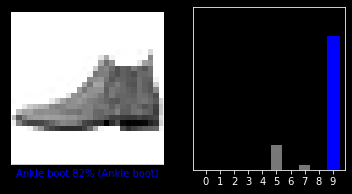

In [35]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

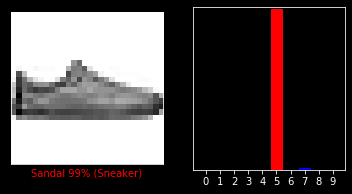

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [38]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model shuold be saved to HDF5.
model.save('my_model.h5') 